Max-Sum equations
--

\begin{align*}
h_{ia}\left(\sigma_{i}\right)= &\sum_{b\in\partial i\setminus a} u_{bi}(\sigma_i) + \sigma_i s_i + const\\
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}h_{ja}\left(\sigma_{j}\right)+const\\
b_{i}\left(\sigma_{i}\right)= &\sum_{b\in\partial} u_{bi}(\sigma_i) + \sigma_i s_i + const\\
\end{align*}

As magnetizations, $h_{ia}(\sigma)=h_{ia}\sigma+const, u_{ai}(\sigma_i)=u_{ai}\sigma_i+const, b_i(\sigma_i)=b_i\sigma_i+const$

\begin{align*}
b_{i}=  & s_{i} + \sum_{a\in\partial i}u_{ai}\\
\sigma_{i}u_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}h_{ja}\sigma_{j}+const\\
u_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}h_{ja}\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}h_{ja}\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}>0\\
\sum_{j\in\partial a\setminus i}\left|h_{ja}\right|-2\min_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}<0\\
\sum_{j\in\partial a\setminus i}\left|h_{ja}\right|-2\min_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}>0\\
\end{cases}\\
=&\begin{cases}
\min_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}>0\\
-\min_{j\in\partial a\setminus i}\left|h_{ja}\right| & \text{if }\prod h_{ja}<0
\end{cases}
\end{align*}

So we finally get
\begin{align*}
u_{ai} &= \min_{j\in\partial a\setminus i}\left|h_{ja}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(h_{ja}\right)\\
h_{ia} &= s_i+ \sum_{b\in\partial i\setminus a} u_{bi}\\
h_i &= s_i+ \sum_{b\in\partial i} u_{bi} 
\end{align*}

Distribution in the quenched disorder (fixed degrees)
---

\begin{align*}
p\left(f\right)= &\sum_{h_{1},\dots,h_{k-1}}\delta\left(f;\min_{j=1,\dots,k}\left|h_{j}\right|\prod_{j=1}^{k-1}\text{sign}h_{j}\right)\prod_{j=1}^{k}q\left(h_{j}\right)\\
q\left(f\right)=&\sum_{u_{1},\dots,u_{d-1}}\frac12\sum_s \delta\left(f;s+\sum_{a=1}^{d-1} u_a \right)\prod_{a=1}^{d-1} p(u_a)
\end{align*}

In [2]:
using OffsetArrays
const ∏ = prod
const ∑ = sum

function iter_slow_factor(q, k)
    N = lastindex(q)
    p = fill(0.0, -N:N)
    for fs ∈ Iterators.product(fill(-N:N,k)...)
        f = minimum(abs.(fs))*sign(∏(fs))
        p[clamp(f, -N, N)] += ∏(q[f1] for f1 ∈ fs)
    end
    p ./= sum(p)
end

function iter_slow_var(p, d) 
    N = lastindex(p)
    q = fill(0.0, -N:N)
    for fs in Iterators.product(fill(-N:N,d)...)
        f = sum(fs)
        prob = 1/2*∏(p[f] for f ∈ fs)
        for s ∈ (-1,1)
            q[clamp(f + s, -N, N)] += prob
        end
    end
    q ./= sum(q)
end

iter_slow_var (generic function with 1 method)

Simplifications
--

\begin{align*}
p_k\left(u; q\right)= & \sum_{h_{1},\dots,h_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|h_{j}\right|\prod_{j=1}^{k}\text{sign}\left(h_{j}\right)\right)\prod_{j=1}^{k}q\left(h_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{h_{1},\dots,h_{k}>0}\delta\left(f;\min_{j=1,\dots,k}h_{j}\right)\prod_{j=1}^{k}2q\left(h_{j}\right) & \text{ for }u>0\\
\sum_{n=1}^{k}\binom{k}{n}q\left(0\right)^{n}\left(2\sum_{h>0}q\left(h\right)\right)^{n-k} & \text{ for }u=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(2\sum_{h\geq u}q\left(h\right)\right)^{k}-\left(2\sum_{h>u}q\left(h\right)\right)^{k}\right\}  & \text{ for }u>0\\
\sum_{n=0}^{k}\binom{k}{n}q\left(0\right)^{n}\left(2\sum_{h>0}q\left(h\right)\right)^{k-n} - \left(2\sum_{h>0}q\left(h\right)\right)^{k} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(2\sum_{h\geq u}q\left(h\right)\right)^{k}-\left(2\sum_{h>u}q\left(h\right)\right)^{k}\right\}  & \text{ for }u>0\\
1 - \left(1-q(0)\right)^{k} & \text{ for }u=0
\end{cases}\\
\end{align*}

In [3]:
function iter_factor(q, k)
    p = zero(q)
    N = lastindex(q)
    for f = 1:N
        v1 = 2q[f]
        v2 = 2∑(q[f+1:N])
        v = (v1+v2)^k-v2^k
        p[+f] = v/2
        p[-f] = v/2
    end
    p[0] = 1-(1-q[0])^k
    p ./ sum(p)
end

iter_factor (generic function with 1 method)

and

\begin{align}
q_0(h; p) &= \frac12(\delta(h-1)+\delta(h+1))\\
q_{d}(h; p) &= \sum_{h',h''} \delta\left(h-h'-h''\right) q_{d-1}(h')p(h'') \text{ for } d\geq 1
\end{align}

In [4]:
function convolve(p1, p2)
    N = max(lastindex(p1), lastindex(p2))
    q = fill(0.0,-N:N)
    for f1 ∈ eachindex(p1)
        for f2 ∈ eachindex(p2)
            q[clamp(f1+f2, -N, N)] += p1[f1]*p2[f2]
        end
    end
    q ./= sum(q)
end

function iter_var(p,d)
    q = zero(p)
    q[-1:1] += [0.5, 0, 0.5]
    for d1 ∈ 1:d
        q = convolve(q, p)
    end
    q
end

iter_var (generic function with 1 method)

In [5]:
N = 10
p0 = fill(0.0, -N:N)
p0[0:3] .= rand(4)
p0[-1:-1:-3] .= p0[1:3]
p0 ./= sum(p0)
p1 = copy(p0)
p2 = copy(p0)

for i=1:4
    p1 = iter_slow_factor(iter_slow_var(p1,2-1),3-1)
    p2 = iter_factor(iter_var(p2,2-1),3-1)
end
[p1[-N:N] p2[-N:N]]

21×2 Matrix{Float64}:
 0.0          0.0
 0.0          0.0
 0.0          0.0
 2.36248e-17  2.36248e-17
 5.22122e-15  5.22122e-15
 2.29701e-8   2.29701e-8
 2.06645e-6   2.06645e-6
 0.00295244   0.00295244
 0.0262883    0.0262883
 0.320926     0.320926
 0.299662     0.299662
 0.320926     0.320926
 0.0262883    0.0262883
 0.00295244   0.00295244
 2.06645e-6   2.06645e-6
 2.29701e-8   2.29701e-8
 5.22122e-15  5.22122e-15
 2.36248e-17  2.36248e-17
 0.0          0.0
 0.0          0.0
 0.0          0.0

RS equations for arbitrary degree profiles $K_k, \Lambda_d$
---


\begin{align}
p(u) &\propto \sum_k k K_k p_{k-1}(u;q)\\
q(h) &\propto \sum_d d \Lambda_d q_{d-1}(h;p)
\end{align}

Free energy and overlap
---
* the Bethe free energy can be written as
\begin{equation}
    F = \sum_{a=1}^m F_a - (|\partial i|-1)\sum_{i=1}^n F_i 
\end{equation}
with
\begin{align*}
    F_a &=-\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\sigma_i\left(s_i+\sum_{b\in\partial i\setminus a}u_{bi}\right)}}{\prod_{b\in\partial i\setminus a}2{\rm cosh}(\beta u_{bi})}\right)\\
    &= -\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a}e^{\beta\sigma_i\left(s_i+\sum_{b\in\partial i\setminus a}u_{bi}\right)}\right)+\frac{1}{\beta}\sum_{i\in\partial a}\sum_{b\in\partial i\setminus a}\log(2{\rm cosh}(\beta u_{bi}))\\
    &\to-\sum_{i\in\partial a}\left(\left|s_i + \sum_{b\in\partial i\setminus a}u_{bi}\right|-\sum_{b\in\partial i\setminus a}|u_{bi}|\right) + \Theta\left(-\prod_{i\in\partial a}\left(s_i + \sum_{b\in\partial i\setminus a}u_{bi}\right)\right)2\min_{i\in\partial a}\left|s_i + \sum_{b\in\partial i\setminus a}u_{bi}\right|
\end{align*}
and 
\begin{align*}
    F_i &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}\frac{e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}u_{ai}\right)}}{\prod_{a\in\partial i}2{\rm cosh}(\beta u_{ai})}\right)\\
    &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}u_{ai}\right)}\right) + \frac{1}{\beta}\sum_{a\in\partial i}\log(2{\rm cosh}(\beta u_{ai}))\\
    &\to- \left|s_i + \sum_{a\in\partial i}u_{ai}\right|+\sum_{a\in\partial i}|u_{ai}|
\end{align*}

Free energy and overlap
---
* the Bethe free energy can be written as
\begin{equation}
    F = \sum_{a=1}^m F_a +\sum_{i=1}^n F_i  - \sum_i \sum_{a\in\partial i} F_{ia}
\end{equation}
with
\begin{align*}
    F_a &=-\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\sigma_ih_{ia}}}{2{\rm cosh}(\beta h_{ia})}\right)\\
    &=-\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a} e^{\beta\sigma_ih_{ia}}\right) + \frac1\beta \log\sum_{i\in\partial a}2{\rm cosh}(\beta h_{ia})\\
    &\to-\sum_{i\in\partial a} \left|h_{ia}\right| + \Theta\left(-\prod_{i\in\partial a}h_{ia}\right)2\min_{i\in\partial a}\left|h_{ia}\right|+\sum_{i\in\partial a} \left|h_{ia}\right|\\
    &=\Theta\left(-\prod_{i\in\partial a}h_{ia}\right)2\min_{i\in\partial a}\left|h_{ia}\right|
\end{align*}

and 
\begin{align*}
    F_i &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}\frac{e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}u_{ai}\right)}}{\prod_{a\in\partial i}2{\rm cosh}(\beta u_{ai})}\right)\\
    &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}u_{ai}\right)}\right) + \frac{1}{\beta}\sum_{a\in\partial i}\log(2{\rm cosh}(\beta u_{ai}))\\
    &\to- \left|s_i + \sum_{a\in\partial i}u_{ai}\right|+\sum_{a\in\partial i}|u_{ai}|
\end{align*}

and
\begin{align}
F_{ia} &= -\frac1\beta\log\left(\sum_{\sigma_i}\frac{e^{\beta\sigma_i\left(h_{ia}+u_{ai}\right)}}{\textrm{cosh}(h_{ia})\textrm{cosh}(u_{ai})}\right)\\
&\to -|h_{ia}+u_{ai}| + |h_{ia}| + |u_{ai}|
\end{align}

So we can cancel out terms and define

\begin{align*}
F&=F_{factors}-F_{vars}\\
F_{factors}&= \sum_a \Theta\left(-\prod_{i\in\partial a}h_{ia}\right)2\min_{i\in\partial a}\left|h_{ia}\right|\\
F_{vars}& = \sum_i \sum_{a\in\partial i}\left|h_{ia}\right| - \sum_i (|\partial i| - 1) \left|h_i\right|
\end{align*}

Averaging, we get

\begin{align*}
\frac1N \mathbb E[F_{factors}] &= \alpha \sum_k K_k \sum_{h_1,\dots,h_k} \Theta\left(-\prod_{i=1}^k h_i \right)2\min_{i=1,...,k}\left|h_i\right|\prod_{i=1}^kq(h_i)\\
\alpha&=\frac{\sum_d d \Lambda_d}{\sum_k kK_k}\\
\frac1N \mathbb E[F_{vars}] &=  \sum_d \Lambda_d \left\{d \sum_h |h| q_{d-1}(h) - (d-1) \sum_h |h|q_d(h)\right\}
\end{align*}

Simplifications for the overlap
--

* The first term can be simplified:
\begin{align*}
\frac1N \mathbb E[F_{factors}] =&\sum_{h_1,\dots,h_k}\Theta\left(-\prod_{i=1}^k h_i\right)2\min_{i=1,\dots,k}\left|h_i\right|\prod_{i=1}^k q(h_i)\\
=& 2^{k}\sum_{h_1,\dots,h_k>0}\min_{i=1,\dots,k} |h_i| \prod_{i=1}^k q(h_i)\\
=& 2^{k}\sum_{h>0}f\sum_{n=1}^k{k\choose n}\left(p(h)\right)^n\left(\sum_{h'>h}p(h')\right)^{k-n} \\
=& 2^k\sum_{h>0}h\left\{ \left(\sum_{h'\geq h}p(h')\right)^k - \left(\sum_{h'>h} p(h')\right)^k\right\}
\end{align*}

In [6]:
overlap_factor(q,k) = 2^k * ∑(f*(∑(q[f:end])^k-∑(q[f+1:end])^k) for f=1:lastindex(q))

overlap_factor (generic function with 1 method)

In [7]:
function RS(Pk, Λ; N=100, tol=1e-5, maxiter=100, damp=0.9)
    ks = [k for k in eachindex(Pk) if Pk[k] > tol]
    ds = [d for d in eachindex(Λ) if Λ[d] > tol]
    @assert ∑(Pk[ks]) ≈ 1 && ∑(Λ[ds]) ≈ 1
    p = fill(1.0, -N:N); p ./= sum(p)
    for iter=1:maxiter
        q = ∑(d*Λ[d]*iter_var(p, d-1) for d=ds)
        q ./= ∑(q)
        p1 = ∑(k*Pk[k]*iter_factor(q, k-1) for k=ks)
        p1 ./= ∑(p1)
        err = maximum(abs, p1 - p); err < tol && (@show err iter; break)
        p .= p .* damp .+ p1 .* (1-damp)
    end
    α = ∑(d*Λ[d] for d=ds) / ∑(k*Pk[k] for k=ks)
    
    q = ∑(d*Λ[d]*iter_var(p, d-1) for d=ds); #fia
    O = ∑(abs(f)*q[f] for f=eachindex(q))
    q2 = ∑((d-1)*Λ[d]*iter_var(p, d) for d=ds); #fi
    O -= ∑(abs(f)*q2[f] for f=eachindex(q2))
    q ./= ∑(q)
    O -= α*∑(Pk[k]*overlap_factor(q,k) for k=ks) #fa
    1-α, (1-O)/2, p  
end

RS (generic function with 1 method)

Results
---

In [8]:
using Unzip

#k=mix of degrees l,l+1, d=2
Rm,Dm=map(0.01:0.01:0.99) do r
    α=1-r
    k=floor(Int, 2/α)
    s=k+1-2/α
    K=[fill(0,k-1); s; 1-s]
    K .*= K .> 1e-10
    K ./ sum(K)
    r1,d,p = RS(K, [0,1]; N=100, tol=1e-10, maxiter=10000)
    @assert r ≈ r1
    r,d
end |>unzip 

err = 9.974929215950112e-11
iter = 7113
err = 9.967487946127562e-11
iter = 3840
err = 9.9612318393838e-11
iter = 2676
err = 9.962644598182635e-11
iter = 2072
err = 9.982786819406897e-11
iter = 1700
err = 9.860740002309853e-11
iter = 1448
err = 9.944509105075383e-11
iter = 1264
err = 9.861056415871872e-11
iter = 1125
err = 9.932599187578717e-11
iter = 1015
err = 9.787481936029963e-11
iter = 927
err = 9.747969098583553e-11
iter = 854
err = 9.916362175843574e-11
iter = 792
err = 9.816880641722037e-11
iter = 740
err = 9.766842890002181e-11
iter = 695
err = 9.999046035602532e-11
iter = 655
err = 9.760903196820436e-11
iter = 621
err = 9.86984383111178e-11
iter = 590
err = 9.67635971349523e-11
iter = 563
err = 9.808875933714489e-11
iter = 538
err = 9.651085486339639e-11
iter = 516
err = 9.987577431758154e-11
iter = 495
err = 9.705325432207701e-11
iter = 477
err = 9.683831514450958e-11
iter = 460
err = 9.847078707991841e-11
iter = 444
err = 9.546730073139997e-11
iter = 430
err = 9.839790093835

([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99], [0.4546486855345735, 0.43565050422455154, 0.42092765051587455, 0.40839439222227814, 0.3972457420212988, 0.38707024431952286, 0.37762426517879744, 0.36874955806589155, 0.3603365352601034, 0.35230563856737  …  0.015666129177324073, 0.013449978144601527, 0.011320125859056951, 0.009302254807463883, 0.007397829094399677, 0.005626430242309077, 0.004010648891503155, 0.001470735838513204, 0.0008131727806713895, 0.0002850227245096981])

In [9]:
#k=3 , d=mix of degrees 1,2
R12,D12=map(1/3:0.01:2/3) do r
    #2-t=t+2(1-t)=3(1-r) 
    t=3r-1
    r1,d,p = RS([0,0,1], [t,1-t]; N=20, tol=1e-10, maxiter=10000)
    @assert r ≈ r1
    r,d
end |> unzip

err = 9.799649980379854e-11
iter = 321
err = 9.832717973168315e-11
iter = 316
err = 9.343753548662903e-11
iter = 312
err = 9.789741239885075e-11
iter = 307
err = 9.628009500772805e-11
iter = 303
err = 9.594142147406615e-11
iter = 299
err = 9.671508038877619e-11
iter = 295
err = 9.851192084298077e-11
iter = 291
err = 9.318612548270266e-11
iter = 288
err = 9.658385202726549e-11
iter = 284
err = 9.269279788171048e-11
iter = 281
err = 9.754175245291208e-11
iter = 277
err = 9.480610740908446e-11
iter = 274
err = 9.265027633986733e-11
iter = 271
err = 9.945688717039047e-11
iter = 267
err = 9.828432512293261e-11
iter = 264
err = 9.759976160594874e-11
iter = 261
err = 9.738010398052666e-11
iter = 258
err = 9.760842134554082e-11
iter = 255
err = 9.827472169376961e-11
iter = 252
err = 9.93732873766362e-11
iter = 249
err = 9.17650955223337e-11
iter = 247
err = 9.346484697303481e-11
iter = 244
err = 9.555589652876506e-11
iter = 241
err = 9.80465153510579e-11
iter = 238
err = 9.149603297231579e-11


([0.3333333333333333, 0.3433333333333333, 0.35333333333333333, 0.36333333333333334, 0.37333333333333335, 0.38333333333333336, 0.3933333333333333, 0.4033333333333333, 0.41333333333333333, 0.42333333333333334  …  0.5733333333333334, 0.5833333333333334, 0.5933333333333334, 0.6033333333333334, 0.6133333333333333, 0.6233333333333333, 0.6333333333333333, 0.6433333333333333, 0.6533333333333333, 0.6633333333333333], [0.20962056095628745, 0.20735484854520947, 0.20510675972527204, 0.2028774314000234, 0.2006681095706887, 0.1984801629443529, 0.1963150986467942, 0.1941745804314955, 0.19206044986217263, 0.18997475105376183  …  0.1646778261813926, 0.16371804813895963, 0.16292944871509907, 0.1623407396438657, 0.16198761138123774, 0.1619150106824913, 0.16218037482422176, 0.16285832422512597, 0.1640476353615466, 0.16588187704481594])

In [10]:
#k=3, d = mix of degrees 2,3
R23,D23=map(0.0:0.01:1/3) do r
    # 3-t=2t+3(1-t)=<d> = 3(1-r) -> t=3r
    t=3r
    r1,d,p = RS([0,0,1], [0,t,1-t]; N=20, tol=1e-10, maxiter=10000)
    @assert r ≈ r1
    r,d
end |>unzip 

err = 9.784095755804856e-11
iter = 733
err = 9.733180927895546e-11
iter = 710
err = 9.758499563972123e-11
iter = 688
err = 9.833306391371366e-11
iter = 667
err = 9.930467559371436e-11
iter = 647
err = 9.635625630721734e-11
iter = 629
err = 9.676559553639663e-11
iter = 611
err = 9.652528776271652e-11
iter = 594
err = 9.951983681588672e-11
iter = 577
err = 9.715572790724991e-11
iter = 562
err = 9.765249719961844e-11
iter = 547
err = 9.65035829025851e-11
iter = 533
err = 9.803213796288901e-11
iter = 519
err = 9.751133234203735e-11
iter = 506
err = 9.953599056089502e-11
iter = 493
err = 9.906681031068842e-11
iter = 481
err = 9.580863880032098e-11
iter = 470
err = 9.997969119268646e-11
iter = 458
err = 9.573530856954449e-11
iter = 448
err = 9.898665220831049e-11
iter = 437
err = 9.882078488843149e-11
iter = 427
err = 9.49084699719549e-11
iter = 418
err = 9.865647188078697e-11
iter = 408
err = 9.845785298168153e-11
iter = 399
err = 9.398082312372935e-11
iter = 391
err = 9.731893069186981e-11

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33], [0.30232474374018364, 0.2991896073555006, 0.2960844176238688, 0.29300798428777985, 0.28995920351242044, 0.28693704969851397, 0.28394056823796304, 0.2809688690843176, 0.2780211210295341, 0.2750965465948728  …  0.2336015808927387, 0.23097235112463632, 0.228358170625707, 0.22575874199075585, 0.22317377881874867, 0.22060300461230437, 0.21804615169011765, 0.2155029600998133, 0.21297317651789582, 0.21045655312219785])

In [11]:
#RS instability?
a=0.54334
Λ=[0,(1-a)/2,a/3]
Λ ./= sum(Λ)
rd,dd,p=RS([0,0,1],Λ; N=10, tol=1e-10, maxiter=10000)

err = 9.824513425016335e-11
iter = 424


(0.18588652886439316, 0.24810421473670274, [6.539193810448665e-18, 6.34662677964226e-15, 3.2910939322005455e-12, 8.935540334190384e-10, 1.227338738008608e-7, 8.3506763004038e-6, 0.00029590923164253514, 0.005899824359813897, 0.057565748390582636, 0.23605422057332928  …  0.23605422057332928, 0.057565748390582636, 0.005899824359813897, 0.00029590923164253514, 8.3506763004038e-6, 1.227338738008608e-7, 8.935540334190384e-10, 3.2910939322005455e-12, 6.34662677964226e-15, 6.539193810448665e-18])

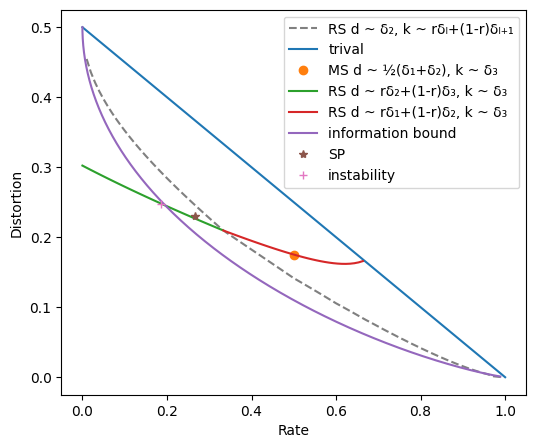

PyObject <matplotlib.legend.Legend object at 0x7f10d99ab970>

In [24]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = subplots(figsize=(6,5))
xlabel("Rate")
ylabel("Distortion")
plot(Rm,Dm, "--", label="RS d ~ δ₂, k ~ rδₗ+(1-r)δₗ₊₁", c=:gray)
plot((0,1),(0.5,0), label="trival")
plot((0.5, 0.174603333333333332)..., "o", label="MS d ~ ½(δ₁+δ₂), k ~ δ₃") 
plot(R23,D23, "-", label="RS d ~ rδ₂+(1-r)δ₃, k ~ δ₃") 
plot(R12,D12, "-", label="RS d ~ rδ₁+(1-r)δ₂, k ~ δ₃")
plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
plot(0.267,0.23, "*", label="SP")
plot(rd,dd, "+", label="instability")
legend()